<a href="https://colab.research.google.com/github/TeddyAbraham/Aerofit/blob/main/Aerofit_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

**Q1.** Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset


In [ ]:
!gdown --id 1jyy6KxR46yVCEtJyNgBnAb4ZMSmDh16Y -O aerofit.csv
aerofit = pd.read_csv("aerofit.csv")   # or pd.read_table("aerofit.txt")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jyy6KxR46yVCEtJyNgBnAb4ZMSmDh16Y
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 23.3MB/s]


In [ ]:
aerofit.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit.isnull().sum()[aerofit.isnull().sum()>0]

,0


<Axes: xlabel='Age', ylabel='Fitness'>

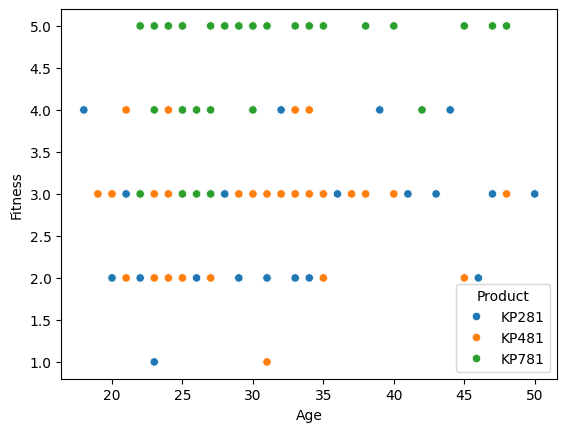

In [ ]:
sns.scatterplot(data=aerofit, x='Age', y='Fitness', hue='Product')

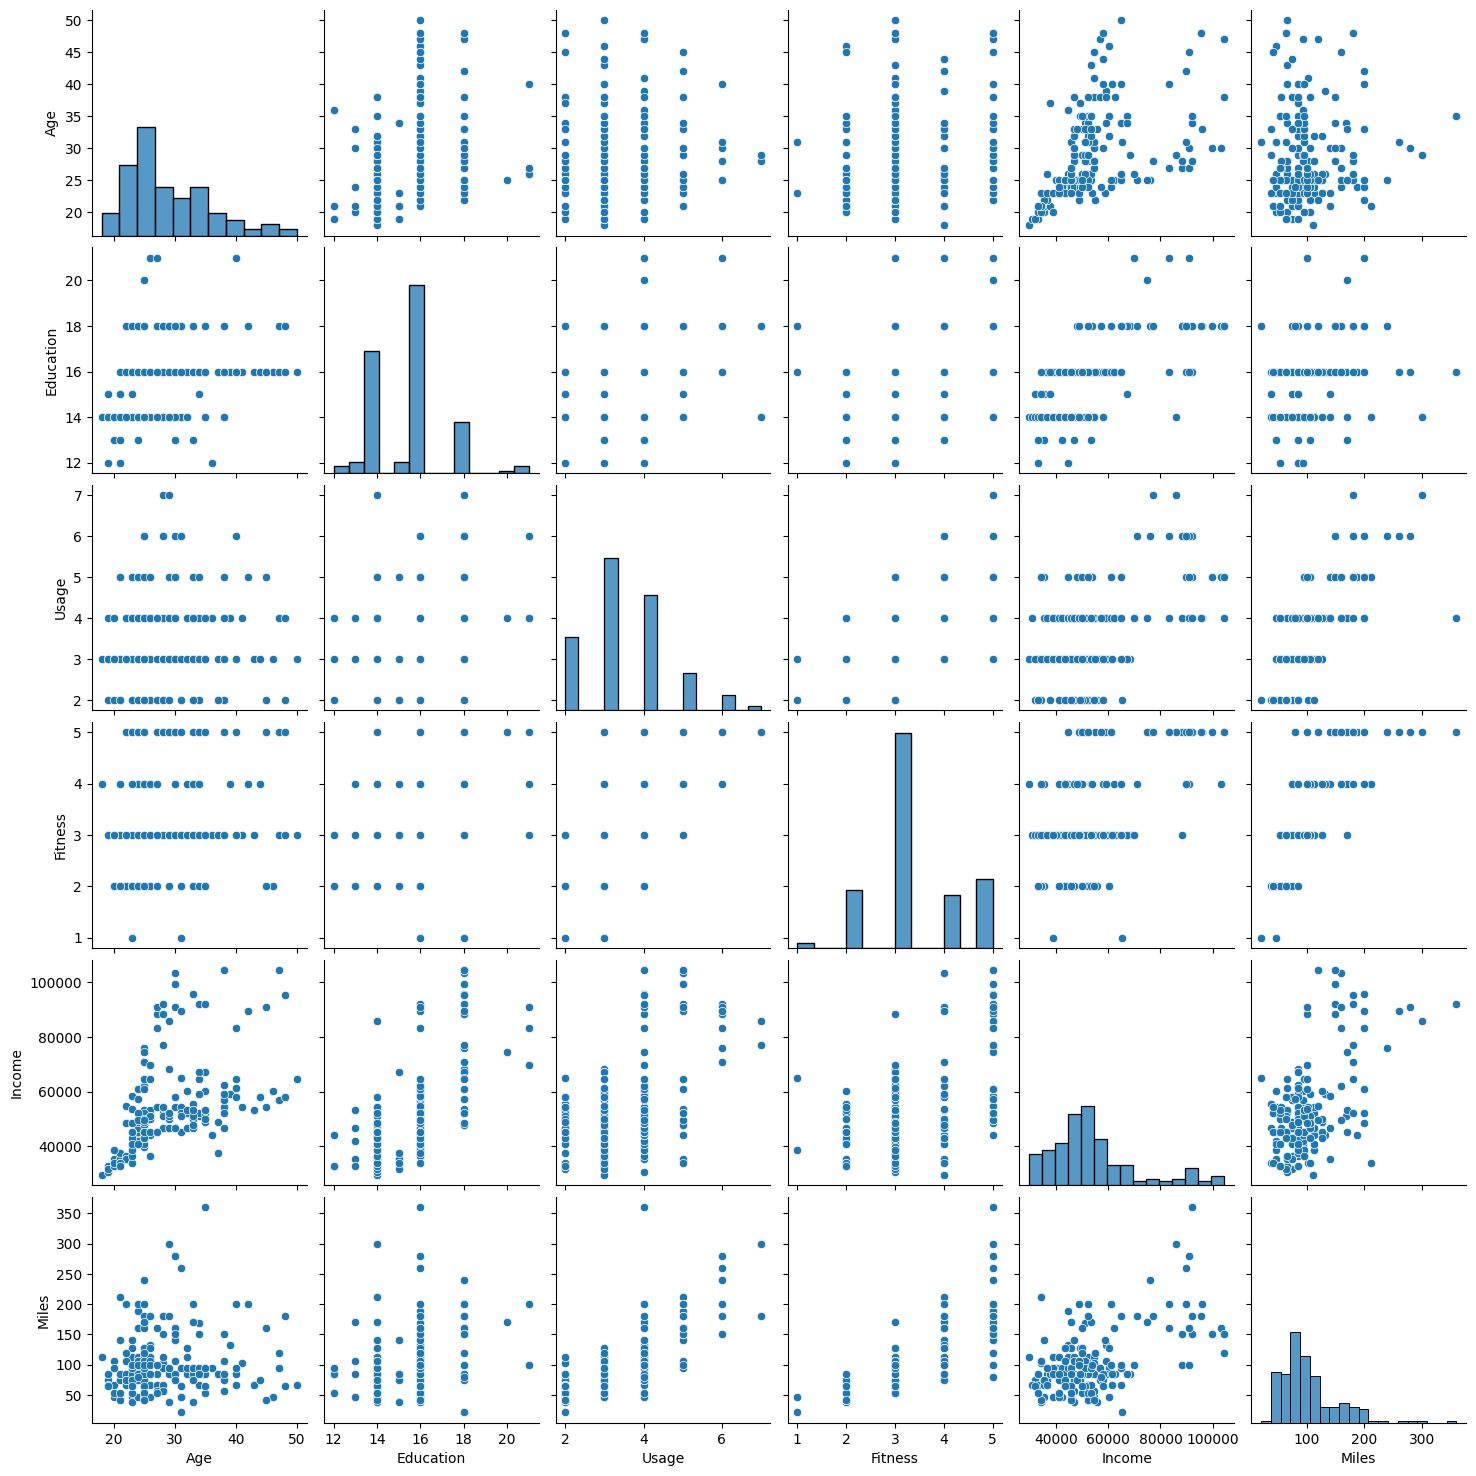

In [ ]:
sns.pairplot(aerofit)

In [ ]:
aerofit.shape

(180, 9)

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights:
* Data looks clean as there is no null values and the Dtype also need not to be changed in any column.

**Q2.** Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)


In [ ]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights:
* While checking for ouliers we can see only in the ***Miles*** column there is a  significant gap between the Mean(103) and Median(94), so we will be checking for any outlier.


In [ ]:
Q1 = aerofit['Miles'].quantile(.25)
Q3  = aerofit['Miles'].quantile(.75)
IQR = Q3-Q1
lower_bound = (1.5 * IQR) - Q1
upper_bound = (1.5 * IQR) + Q3
outliers = aerofit[(aerofit['Miles']<lower_bound) | (aerofit['Miles']>upper_bound)]
print('lower_bound : ',lower_bound)
print('upper_bound :', upper_bound)
print(outliers['Miles'])

lower_bound :  7.125
upper_bound : 187.875
23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200
Name: Miles, dtype: int64


In [ ]:
aerofit = aerofit[(aerofit['Miles'] >= lower_bound) & (aerofit['Miles'] <= upper_bound)]
aerofit.shape

(167, 9)

Insights:
* Since there were 13 outliers in the ***Miles*** Column, we have deleted the same.

<Axes: ylabel='Miles'>

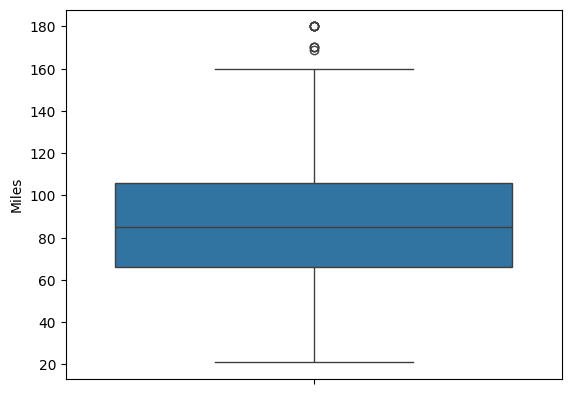

In [ ]:
sns.boxplot(data=aerofit, y='Miles')

In [ ]:
aerofit.nunique()

,0
Product,3
Age,31
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,57
Miles,29


Insights:
* For easy analysis few of the columns needs to be categorize (bin-wise) are namely ***Age***, ***Income*** & ***Miles*** using bins.

In [ ]:
aerofit_products = aerofit['Product'].value_counts()
aerofit_products

,count
Product,
KP281,79
KP481,59
KP781,29



**Q3.** Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)


In [ ]:
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48])

In [ ]:
age_bin = range(15,51, 5)
aerofit['age_group'] = pd.cut(aerofit['Age'], age_bin)
aerofit.head(5)

/tmp/ipython-input-1122800920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerofit['age_group'] = pd.cut(aerofit['Age'], age_bin)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]"




**Q4.** Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['age_group'], margins =True)

age_group,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]",All
Product,,,,,,,,
KP281,6,27,21,11,8,3,3,79
KP481,4,23,7,17,6,1,1,59
KP781,0,13,11,1,1,1,2,29
All,10,63,39,29,15,5,6,167


Insights:
* Most of the people purchasing the products are of the age group of 20-15, and as the age_group increases we can see a decrease in number. However in 45-50 years we see a slight rise than that of 40-45 age_group.

<Axes: xlabel='age_group', ylabel='count'>

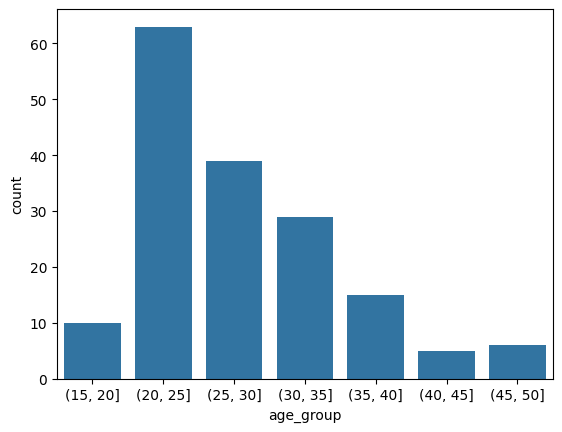

In [ ]:
sns.countplot(data = aerofit, x = 'age_group')

Insight:
* Around 38%(63/167) are in the age category of 20-25.
* And among that age category KP781 has more percentage of people (13/29 = 45%) than that of KP281 - 34% and KP481 - 34%

<Axes: xlabel='age_group', ylabel='count'>

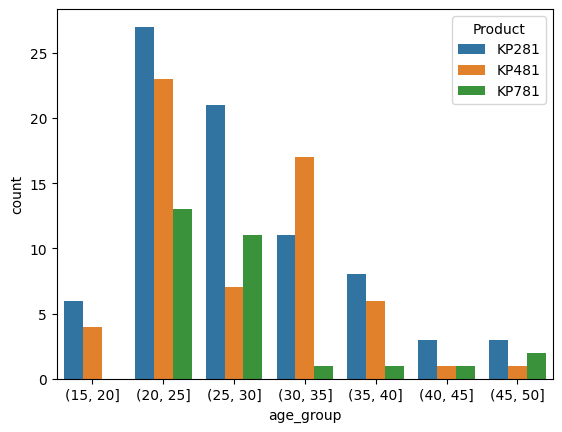

In [ ]:
sns.countplot(data=aerofit, x='age_group', hue='Product', dodge=True)

In [ ]:
aerofit_gender = aerofit['Gender'].value_counts()
aerofit_gender

,count
Gender,
Male,97
Female,70


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,39,40,79
KP481,28,31,59
KP781,3,26,29
All,70,97,167


Insights:
* For KP281 and KP481 the percentage of Females using the products are almost equal comparing to Males.
* However for KP781 around 90% of the people using the products are Male

**Q6.** With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
- *Ans* 15%(26/167) male customer buying KP781. However around 90%(26/29) amoung the people purchasing KP781 are males.

<Axes: xlabel='Product', ylabel='count'>

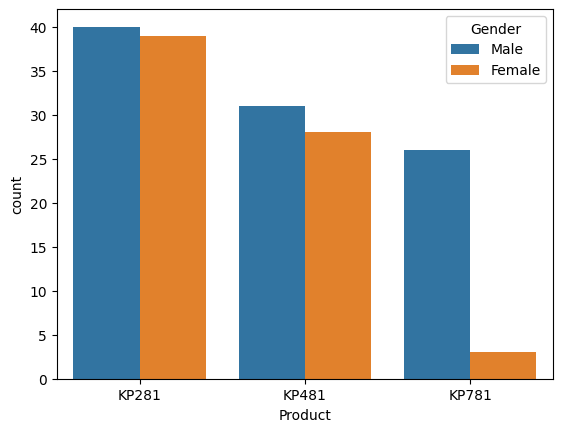

In [ ]:
sns.countplot(data=aerofit, x='Product', hue='Gender', dodge=True)

In [ ]:
aerofit_edu = aerofit['Education'].value_counts()
aerofit_edu # No of years of education

,count
Education,
16,80
14,53
18,18
15,5
13,5
12,3
21,2
20,1


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['Education'], margins = True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,38,2,0,0,79
KP481,1,2,22,1,31,2,0,0,59
KP781,0,0,1,0,11,14,1,2,29
All,3,5,53,5,80,18,1,2,167


Insights:
* Around 80% of the people have done 16 years of Education, out of which around 50%(38/79) are KP281 users
* Around 50%(14/29) people using KP281 are having 18years of Education, and among this Education categories 77%(14/18) people are using KP781.

<Axes: xlabel='Education', ylabel='Count'>

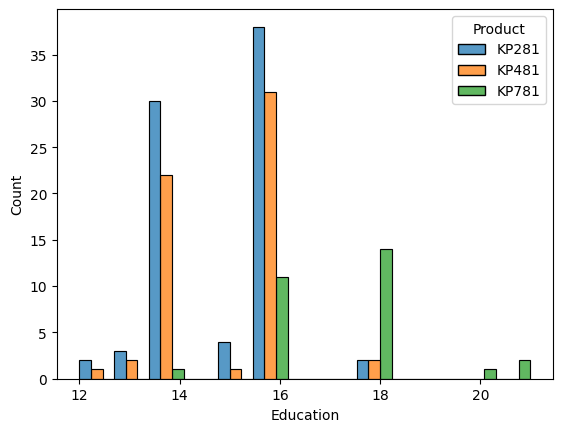

In [ ]:
sns.histplot(data=aerofit, x='Education', hue='Product', multiple = 'dodge')

In [ ]:
aerofit_material = aerofit['MaritalStatus'].value_counts()
aerofit_material

,count
MaritalStatus,
Partnered,98
Single,69


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,47,32,79
KP481,35,24,59
KP781,16,13,29
All,98,69,167


Insights:
* There are more maried people coming for fitness than single.
* The gap between the Single and Partnered counple are decreasing as we move from KP281 to KP481 and the KP781.

<Axes: xlabel='Product', ylabel='count'>

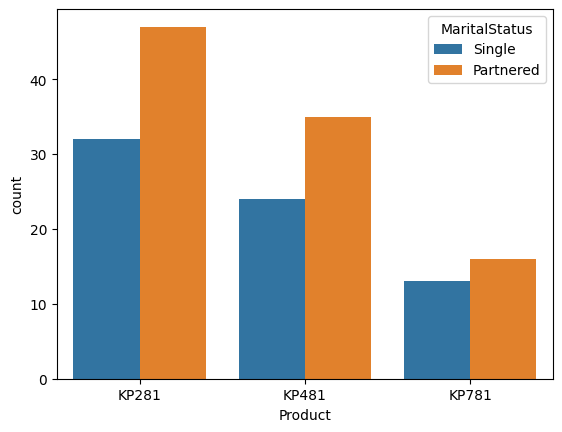

In [ ]:
sns.countplot(data=aerofit, x='Product', hue='MaritalStatus', dodge=True)

In [ ]:
aerofit_usage = aerofit['Usage'].value_counts()
aerofit_usage

,count
Usage,
3,69
4,49
2,33
5,12
6,3
7,1


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['Usage'], margins = True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,1,0,0,79
KP481,14,31,12,2,0,0,59
KP781,0,1,15,9,3,1,29
All,33,69,49,12,3,1,167


Insights:
* Around 61%((33+69)/167) people plan to use the threadmills on an average in a week and around 90% people uses upto 4 times.
* Among the people using KP481 52%(31/59) uses it average 3 times in a week.
* *Among the people using the threadmills 5 and above times a week 81%(9+3+1)/(12+3+1) of them uses KP781*

<Axes: xlabel='Usage', ylabel='count'>

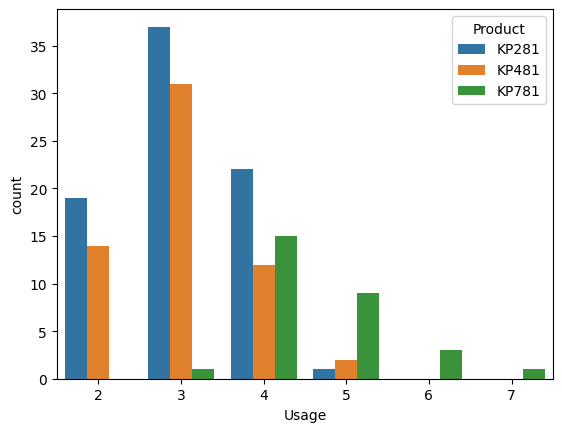

In [ ]:
sns.countplot(data=aerofit, x='Usage', hue='Product', dodge = True)

In [ ]:
aerofit_fitness = aerofit['Fitness'].value_counts()
aerofit_fitness

,count
Fitness,
3,97
2,26
4,22
5,20
1,2


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['Fitness'], margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,1,79
KP481,1,12,39,7,0,59
KP781,0,0,4,6,19,29
All,2,26,97,22,20,167


Insights:
* More fitness rating of 4 and 5 are given by the users KP781
* Though more people are using KP281, however the advanced model KP781 users are more satisified with better self rated fitness

<Axes: xlabel='Fitness', ylabel='Count'>

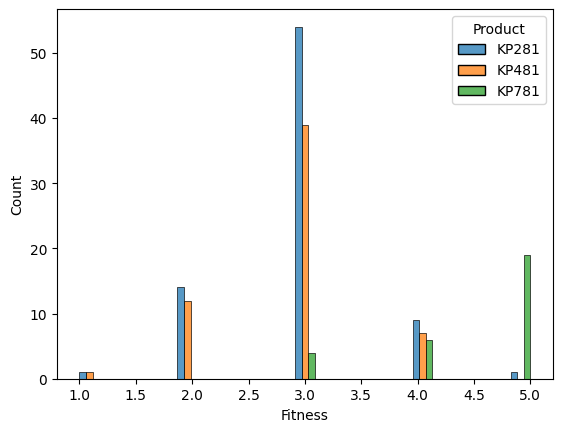

In [ ]:
sns.histplot(data=aerofit, x='Fitness', hue='Product', multiple = 'dodge')

In [ ]:
aerofit_income = aerofit['Income'].value_counts().sort_index(ascending = False)
aerofit_income = pd.DataFrame(aerofit_income)
aerofit_income.shape
#need to create bins, histograph

(57, 1)

In [ ]:
income_bins = range(25000, 110000, 10000)
aerofit['income_group'] = pd.cut(aerofit['Income'], income_bins, right = True)
aerofit.head()

/tmp/ipython-input-350848272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerofit['income_group'] = pd.cut(aerofit['Income'], income_bins, right = True)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(25000, 35000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(25000, 35000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(25000, 35000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(25000, 35000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(35000, 45000]"


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['income_group'], margins =True)

income_group,"(25000, 35000]","(35000, 45000]","(45000, 55000]","(55000, 65000]","(65000, 75000]","(75000, 85000]","(85000, 95000]","(95000, 105000]",All
Product,,,,,,,,,
KP281,8,25,35,9,2,0,0,0,79
KP481,5,9,33,10,2,0,0,0,59
KP781,0,0,7,6,3,2,6,5,29
All,13,34,75,25,7,2,6,5,167


Insights:
* Most of the lower income group people opt for KP281, also its seen that most of them don't use KP781,
* People of the higher income group preffer KP781
* (6+5)/29 more than 38 % people using KP781 are of the Income group more than 85,000
* Around 88% of the KP281 users are in the Income category of 35000- 55000.

<Axes: xlabel='Income', ylabel='Count'>

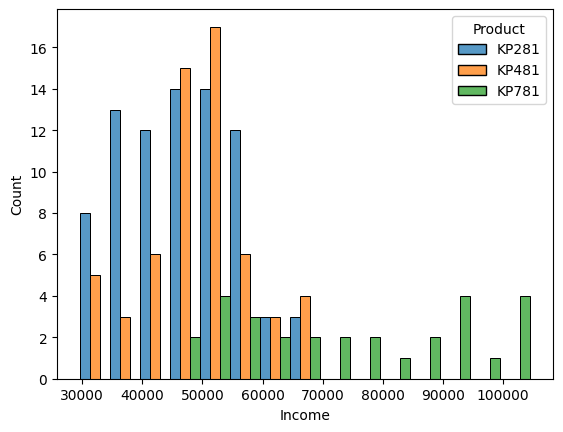

In [ ]:
sns.histplot(data=aerofit, x='Income', hue='Product', multiple = 'dodge')

In [ ]:
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38,  56, 132, 169,
        64,  53, 106,  95,  42, 127,  74, 170,  21, 120, 140, 100,  80,
       160, 180, 150])

In [ ]:
miles_bins = range(0, 201, 25)
aerofit['miles_group'] = pd.cut(aerofit['Miles'], miles_bins, right = True)
aerofit.head()

/tmp/ipython-input-3970254440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerofit['miles_group'] = pd.cut(aerofit['Miles'], miles_bins, right = True)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(25000, 35000]","(100, 125]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(25000, 35000]","(50, 75]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(25000, 35000]","(50, 75]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(25000, 35000]","(75, 100]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(35000, 45000]","(25, 50]"


In [ ]:
pd.crosstab(aerofit['Product'], aerofit['miles_group'], margins =True)

miles_group,"(0, 25]","(25, 50]","(50, 75]","(75, 100]","(100, 125]","(125, 150]","(150, 175]","(175, 200]",All
Product,,,,,,,,,
KP281,0,12,26,24,12,4,1,0,79
KP481,1,4,16,23,8,5,2,0,59
KP781,0,0,0,8,4,5,6,6,29
All,1,16,42,55,24,14,9,6,167


Insights:
* More than 41% ((6+6)/29) people who uses KP781 are able to walk more than 150 Miles and more than 72% walk more than 100 Miles.
* However most of the people using KP281 & KP481 are able to walk  50-100 miles only.

<Axes: xlabel='Miles', ylabel='Count'>

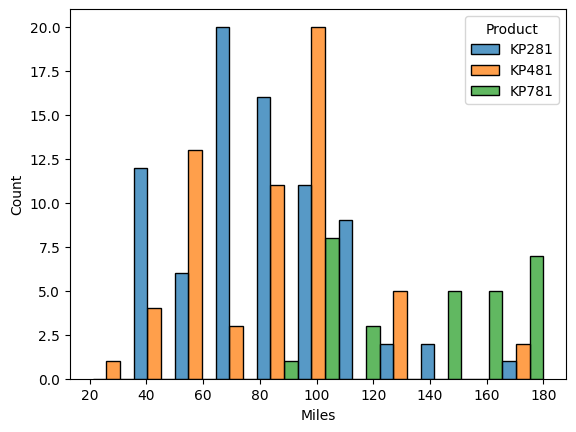

In [ ]:
sns.histplot(data=aerofit, x='Miles', hue='Product', multiple = 'dodge')

<Axes: xlabel='Age', ylabel='Miles'>

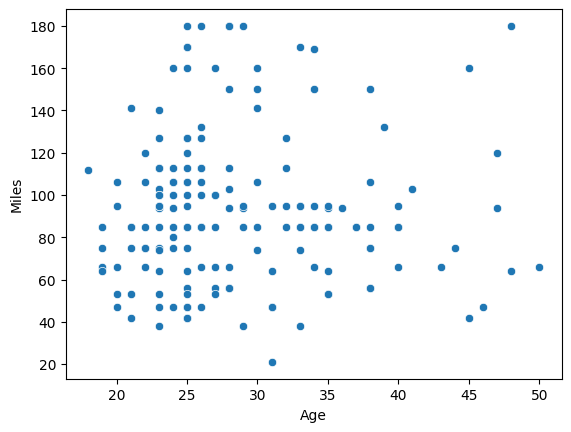

In [ ]:
sns.scatterplot(data = aerofit, x = 'Age', y = 'Miles')

**Insights:**
* As the Age progress the number of peoples walking more miles decreses.

<Axes: xlabel='MaritalStatus', ylabel='Gender'>

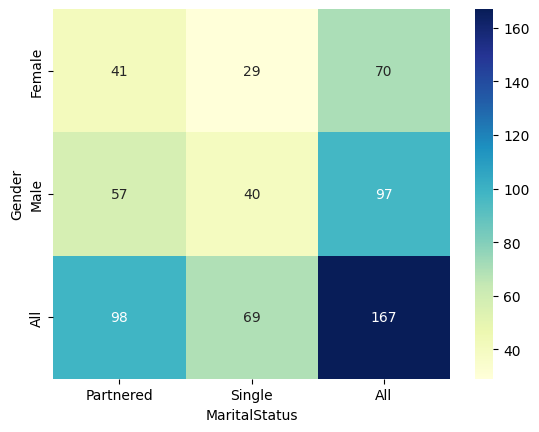

In [ ]:
gender_Maritalstatus = pd.crosstab(aerofit['Gender'], aerofit['MaritalStatus'], margins = True)
sns.heatmap(gender_Maritalstatus, annot=True, cmap='YlGnBu', fmt='d')


**Insights:**
-

<Axes: xlabel='Education', ylabel='income_group'>

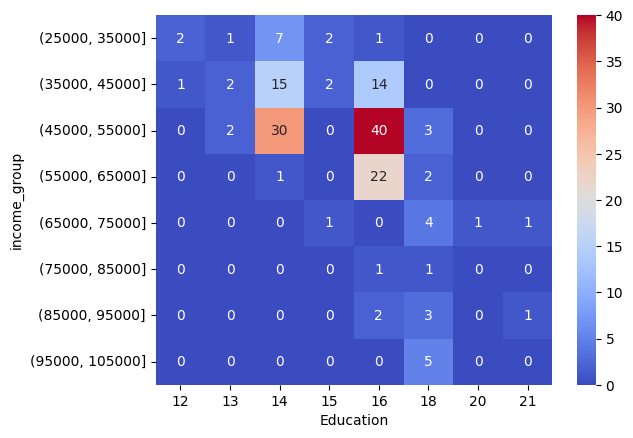

In [ ]:
inc_edu = aerofit[['income_group', 'Education']]
inc_edu = pd.crosstab(inc_edu['income_group'], inc_edu['Education'])
sns.heatmap(inc_edu, annot = True, cmap = 'coolwarm' )

**Insights:**
- Most of the people belong to 14 & 16 years of Education, who have around 45-55 thousand dollars as their annual income.
- As the education level increases the income also increases.
- However people with most income group (i.e 95000-105000) have 18 years of education

Final Insights and Recomendations:
* From the above analysis it is understandable KP781 is suitable for people who are more interested in fitness and can be considered as a high end model.
* At the same time KP281 can be consider as a start level products which can be promoted for the starting level people who may not be much in to fitness or may be from the lower income group.
* KP481 is the middle level product and the startergy should be made to motivate to go for KP481 form the KP281 users, and to KP781 from KP481.
* A lot of Married people are using threadmills, so few offers for the couple can be benifitted.

In [ ]:
aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)